In [3]:
import pandas as pd
import random


In [4]:
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         'query_file.csv',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

In [5]:
df['category_id'] = df['Label'].factorize()[0]
category_id_df = df[['Label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Label']].values)
df.head()

,Label,Query,category_id
0,abruzzo,abruzzo map,0
1,abruzzo,abruzzo restaurant calgary,0
2,academic conferences & publications,academy health,1
3,acapulco,acapulco information,2
4,acapulco,access locksmith,2


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [8]:
features = tfidf.fit_transform(df.Query).toarray()
labels = df.category_id
features.shape

(11187, 2036)

In [9]:
from sklearn.feature_selection import chi2
import numpy as np

In [10]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '??d?':
  . Most correlated unigrams:
. online
. music
  . Most correlated bigrams:
. free download
. real estate
# '?le-de-france':
  . Most correlated unigrams:
. leeds
. led
  . Most correlated bigrams:
. homes sale
. leeds bradford
# 'abruzzo':
  . Most correlated unigrams:
. restaurant
. calgary
  . Most correlated bigrams:
. free download
. real estate
# 'academic conferences & publications':
  . Most correlated unigrams:
. health
. academy
  . Most correlated bigrams:
. free download
. real estate
# 'acapulco':
  . Most correlated unigrams:
. access
. accessories
  . Most correlated bigrams:
. real estate
. mobile phones
# 'accident & personal injury law':
  . Most correlated unigrams:
. accomodation
. accommodation
  . Most correlated bigrams:
. real estate
. mexico city
# 'accounting & auditing':
  . Most correlated unigrams:
. auditing
. accounting
  . Most correlated bigrams:
. free download
. real estate
# 'accounting & financial software':
  . Most correlated unigrams:
.

# 'animated films':
  . Most correlated unigrams:
. films
. animation
  . Most correlated bigrams:
. real estate
. free download
# 'ankara':
  . Most correlated unigrams:
. eating
. star
  . Most correlated bigrams:
. real estate
. travel insurance
# 'antalya':
  . Most correlated unigrams:
. port
. antalya
  . Most correlated bigrams:
. free download
. real estate
# 'anthropology':
  . Most correlated unigrams:
. glasses
. anthropology
  . Most correlated bigrams:
. real estate
. san diego
# 'antigua & barbuda':
  . Most correlated unigrams:
. antigua
. antique
  . Most correlated bigrams:
. rent car
. engagement rings
# 'antiques & collectibles':
  . Most correlated unigrams:
. angeles
. 2011
  . Most correlated bigrams:
. real estate
. los angeles
# 'aomori':
  . Most correlated unigrams:
. ski
. transmission
  . Most correlated bigrams:
. free download
. real estate
# 'aosta valley':
  . Most correlated unigrams:
. apartment
. apartments
  . Most correlated bigrams:
. apartment ren

# 'bakeries':
  . Most correlated unigrams:
. fund
. bakery
  . Most correlated bigrams:
. real estate
. games online
# 'balearic islands':
  . Most correlated unigrams:
. culture
. islands
  . Most correlated bigrams:
. free download
. real estate
# 'bali':
  . Most correlated unigrams:
. villa
. bali
  . Most correlated bigrams:
. free download
. real estate
# 'baltics':
  . Most correlated unigrams:
. cruises
. sea
  . Most correlated bigrams:
. free download
. real estate
# 'baltimore metro':
  . Most correlated unigrams:
. flooring
. skiing
  . Most correlated bigrams:
. free download
. real estate
# 'bangalore':
  . Most correlated unigrams:
. bus
. bangalore
  . Most correlated bigrams:
. free download
. real estate
# 'bangkok':
  . Most correlated unigrams:
. centre
. bangkok
  . Most correlated bigrams:
. real estate
. hotels star
# 'bangladesh':
  . Most correlated unigrams:
. bosnia
. bangladesh
  . Most correlated bigrams:
. free download
. real estate
# 'bank-owned & forec

# 'bmx bikes':
  . Most correlated unigrams:
. board
. bmx
  . Most correlated bigrams:
. free download
. real estate
# 'board games':
  . Most correlated unigrams:
. schools
. colorado
  . Most correlated bigrams:
. free download
. real estate
# 'boating':
  . Most correlated unigrams:
. seat
. boats
  . Most correlated bigrams:
. real estate
. boats sale
# 'boats & watercraft':
  . Most correlated unigrams:
. resorts
. boat
  . Most correlated bigrams:
. real estate
. buenos aires
# 'bodrum':
  . Most correlated unigrams:
. palace
. bodrum
  . Most correlated bigrams:
. free download
. real estate
# 'body art':
  . Most correlated unigrams:
. online
. images
  . Most correlated bigrams:
. free download
. real estate
# 'bodybuilding':
  . Most correlated unigrams:
. body
. workwear
  . Most correlated bigrams:
. free download
. real estate
# 'bogota':
  . Most correlated unigrams:
. colombia
. bogota
  . Most correlated bigrams:
. free download
. real estate
# 'bolivia':
  . Most corr

# 'business process':
  . Most correlated unigrams:
. business
. process
  . Most correlated bigrams:
. open source
. business process
# 'business services':
  . Most correlated unigrams:
. business
. team
  . Most correlated bigrams:
. free download
. real estate
# 'butchers':
  . Most correlated unigrams:
. buying
. buy
  . Most correlated bigrams:
. kitchen appliances
. new england
# 'c?diz':
  . Most correlated unigrams:
. rack
. cd
  . Most correlated bigrams:
. free download
. real estate
# 'c?te d'ivoire':
  . Most correlated unigrams:
. free
. online
  . Most correlated bigrams:
. free download
. real estate
# 'cable & satellite providers':
  . Most correlated unigrams:
. cad
. pune
  . Most correlated bigrams:
. free download
. real estate
# 'cad & cam':
  . Most correlated unigrams:
. cad
. projects
  . Most correlated bigrams:
. free download
. real estate
# 'cadillac':
  . Most correlated unigrams:
. cad
. cadillac
  . Most correlated bigrams:
. real estate
. interior desig

# 'charity & philanthropy':
  . Most correlated unigrams:
. silent
. telemarketing
  . Most correlated bigrams:
. real estate
. charleston sc
# 'charlotte metro':
  . Most correlated unigrams:
. cheapest
. cheap
  . Most correlated bigrams:
. cheap hotels
. cheap flights
# 'cheerleading':
  . Most correlated unigrams:
. companies
. tops
  . Most correlated bigrams:
. free download
. real estate
# 'cheese':
  . Most correlated unigrams:
. cheese
. chemical
  . Most correlated bigrams:
. real estate
. birmingham al
# 'chemistry':
  . Most correlated unigrams:
. notes
. chemistry
  . Most correlated bigrams:
. free download
. real estate
# 'chennai':
  . Most correlated unigrams:
. customs
. chennai
  . Most correlated bigrams:
. free download
. real estate
# 'chess & abstract strategy games':
  . Most correlated unigrams:
. online
. norway
  . Most correlated bigrams:
. free download
. real estate
# 'chhattisgarh':
  . Most correlated unigrams:
. daily
. chhattisgarh
  . Most correlated 

# 'company news':
  . Most correlated unigrams:
. company
. compare
  . Most correlated bigrams:
. free download
. real estate
# 'compensation & benefits':
  . Most correlated unigrams:
. gymnastics
. cd
  . Most correlated bigrams:
. free download
. real estate
# 'computer & video games':
  . Most correlated unigrams:
. nashville
. concert
  . Most correlated bigrams:
. free download
. real estate
# 'computer components':
  . Most correlated unigrams:
. covers
. computer
  . Most correlated bigrams:
. free download
. real estate
# 'computer education':
  . Most correlated unigrams:
. education
. websites
  . Most correlated bigrams:
. free download
. real estate
# 'computer hardware':
  . Most correlated unigrams:
. basics
. hardware
  . Most correlated bigrams:
. real estate
. computer hardware
# 'computer memory':
  . Most correlated unigrams:
. solutions
. monitor
  . Most correlated bigrams:
. free download
. real estate
# 'computer monitors & displays':
  . Most correlated unigra

# 'czech republic':
  . Most correlated unigrams:
. online
. republic
  . Most correlated bigrams:
. free download
. real estate
# 'daejeon':
  . Most correlated unigrams:
. independent
. daily
  . Most correlated bigrams:
. real estate
. inland empire
# 'dallas-fort worth':
  . Most correlated unigrams:
. dallas
. worth
  . Most correlated bigrams:
. fort worth
. dallas fort
# 'dance':
  . Most correlated unigrams:
. bags
. dance
  . Most correlated bigrams:
. free download
. real estate
# 'dance & electronic music':
  . Most correlated unigrams:
. backup
. montenegro
  . Most correlated bigrams:
. real estate
. radio online
# 'data backup & recovery':
  . Most correlated unigrams:
. tools
. marketing
  . Most correlated bigrams:
. free download
. real estate
# 'data management':
  . Most correlated unigrams:
. data
. recovery
  . Most correlated bigrams:
. real estate
. global warming
# 'data sheets & electronics reference':
  . Most correlated unigrams:
. storage
. data
  . Most cor

# 'drunk driving law':
  . Most correlated unigrams:
. pork
. drunk
  . Most correlated bigrams:
. real estate
. drunk driving
# 'dublin':
  . Most correlated unigrams:
. trips
. dublin
  . Most correlated bigrams:
. free download
. real estate
# 'duesseldorf':
  . Most correlated unigrams:
. ticket
. dvd
  . Most correlated bigrams:
. ice skating
. legislative branch
# 'dvd & video rentals':
  . Most correlated unigrams:
. dvd
. shopping
  . Most correlated bigrams:
. free download
. real estate
# 'dvd players & recorders':
  . Most correlated unigrams:
. drive
. dvd
  . Most correlated bigrams:
. real estate
. blu ray
# 'dvrs & set-top boxes':
  . Most correlated unigrams:
. free
. online
  . Most correlated bigrams:
. free download
. real estate
# 'dyes & pigments':
  . Most correlated unigrams:
. early
. childhood
  . Most correlated bigrams:
. real estate
. early childhood
# 'e-book readers':
  . Most correlated unigrams:
. free
. online
  . Most correlated bigrams:
. free downloa

# 'exchanges':
  . Most correlated unigrams:
. exchange
. fund
  . Most correlated bigrams:
. free download
. real estate
# 'executive & management jobs':
  . Most correlated unigrams:
. executive
. exotic
  . Most correlated bigrams:
. hard drive
. office furniture
# 'executive branch':
  . Most correlated unigrams:
. assistant
. executive
  . Most correlated bigrams:
. free download
. real estate
# 'exotic pets':
  . Most correlated unigrams:
. shops
. exotic
  . Most correlated bigrams:
. free download
. real estate
# 'expatriate communities':
  . Most correlated unigrams:
. bikes
. bmx
  . Most correlated bigrams:
. free download
. real estate
# 'experimental & industrial music':
  . Most correlated unigrams:
. 2015
. export
  . Most correlated bigrams:
. free download
. real estate
# 'expos & conventions':
  . Most correlated unigrams:
. shuttle
. external
  . Most correlated bigrams:
. silicon valley
. online shopping
# 'extreme sports':
  . Most correlated unigrams:
. eye
. thro

# 'formal wear':
  . Most correlated unigrams:
. lesson
. formal
  . Most correlated bigrams:
. free download
. real estate
# 'forms guides & templates':
  . Most correlated unigrams:
. baby
. worth
  . Most correlated bigrams:
. real estate
. fort worth
# 'fort myers-cape coral':
  . Most correlated unigrams:
. fl
. fort
  . Most correlated bigrams:
. free download
. real estate
# 'fortaleza':
  . Most correlated unigrams:
. florida
. fort
  . Most correlated bigrams:
. free download
. real estate
# 'forum & chat providers':
  . Most correlated unigrams:
. grants
. frames
  . Most correlated bigrams:
. real estate
. investment banking
# 'france':
  . Most correlated unigrams:
. pyrenees
. france
  . Most correlated bigrams:
. free download
. real estate
# 'frankfurt':
  . Most correlated unigrams:
. online
. museums
  . Most correlated bigrams:
. free download
. real estate
# 'fraternities, sororities & student societies':
  . Most correlated unigrams:
. download
. free
  . Most corre

# 'gps & navigation':
  . Most correlated unigrams:
. graduate
. gps
  . Most correlated bigrams:
. early childhood
. student loans
# 'grains & pasta':
  . Most correlated unigrams:
. osaka
. grand
  . Most correlated bigrams:
. free download
. real estate
# 'grand rapids-west michigan':
  . Most correlated unigrams:
. jamaica
. grants
  . Most correlated bigrams:
. free download
. real estate
# 'graphic design':
  . Most correlated unigrams:
. design
. graphic
  . Most correlated bigrams:
. real estate
. graphic design
# 'graphics & animation software':
  . Most correlated unigrams:
. skirt
. great
  . Most correlated bigrams:
. real estate
. office supplies
# 'great plains (usa)':
  . Most correlated unigrams:
. packages
. great
  . Most correlated bigrams:
. real estate
. vacation packages
# 'greater cleveland':
  . Most correlated unigrams:
. association
. cleveland
  . Most correlated bigrams:
. free download
. real estate
# 'greater toronto':
  . Most correlated unigrams:
. movie

# 'hiking & camping':
  . Most correlated unigrams:
. romania
. hiking
  . Most correlated bigrams:
. lake tahoe
. sheet music
# 'hinduism':
  . Most correlated unigrams:
. hip
. hinduism
  . Most correlated bigrams:
. music free
. hip hop
# 'hiroshima':
  . Most correlated unigrams:
. image
. hiroshima
  . Most correlated bigrams:
. free download
. real estate
# 'historical sites & buildings':
  . Most correlated unigrams:
. philadelphia
. historic
  . Most correlated bigrams:
. free download
. real estate
# 'history':
  . Most correlated unigrams:
. holocaust
. history
  . Most correlated bigrams:
. northern territory
. hiv aids
# 'ho chi minh city':
  . Most correlated unigrams:
. minh
. chi
  . Most correlated bigrams:
. ho chi
. chi minh
# 'hobbies & leisure':
  . Most correlated unigrams:
. free
. online
  . Most correlated bigrams:
. free download
. real estate
# 'hockey':
  . Most correlated unigrams:
. online
. hockey
  . Most correlated bigrams:
. free download
. real estate


# 'indianapolis':
  . Most correlated unigrams:
. 10
. indianapolis
  . Most correlated bigrams:
. real estate
. weather forecast
# 'indie & alternative music':
  . Most correlated unigrams:
. people
. indigenous
  . Most correlated bigrams:
. free download
. real estate
# 'indigenous peoples':
  . Most correlated unigrams:
. plans
. indigenous
  . Most correlated bigrams:
. free download
. real estate
# 'indonesia':
  . Most correlated unigrams:
. indonesia
. indoor
  . Most correlated bigrams:
. free download
. lonely planet
# 'industrial & product design':
  . Most correlated unigrams:
. gerd
. glasses
  . Most correlated bigrams:
. mental health
. engagement rings
# 'infectious diseases':
  . Most correlated unigrams:
. diseases
. infectious
  . Most correlated bigrams:
. real estate
. infectious diseases
# 'infiniti':
  . Most correlated unigrams:
. convertible
. information
  . Most correlated bigrams:
. global warming
. mutual funds
# 'inheritance & estate planning':
  . Most co

# 'kagoshima':
  . Most correlated unigrams:
. live
. listen
  . Most correlated bigrams:
. free download
. real estate
# 'kalimantan':
  . Most correlated unigrams:
. uganda
. industries
  . Most correlated bigrams:
. free download
. real estate
# 'kanagawa':
  . Most correlated unigrams:
. science
. park
  . Most correlated bigrams:
. free download
. real estate
# 'kansas':
  . Most correlated unigrams:
. case
. kansas
  . Most correlated bigrams:
. free download
. real estate
# 'kansas city':
  . Most correlated unigrams:
. kyrgyzstan
. kansas
  . Most correlated bigrams:
. restaurant supply
. kansas city
# 'kanto':
  . Most correlated unigrams:
. radio
. region
  . Most correlated bigrams:
. free download
. real estate
# 'karachi':
  . Most correlated unigrams:
. temperature
. uzbekistan
  . Most correlated bigrams:
. free download
. real estate
# 'karnataka':
  . Most correlated unigrams:
. results
. karnataka
  . Most correlated bigrams:
. free download
. real estate
# 'kauai':
 

# 'liechtenstein':
  . Most correlated unigrams:
. beijing
. life
  . Most correlated bigrams:
. free download
. real estate
# 'life simulation games':
  . Most correlated unigrams:
. court
. skills
  . Most correlated bigrams:
. high school
. lesson plans
# 'lima':
  . Most correlated unigrams:
. limo
. lima
  . Most correlated bigrams:
. west midlands
. credit card
# 'limousin':
  . Most correlated unigrams:
. online
. airport
  . Most correlated bigrams:
. free download
. real estate
# 'lincoln':
  . Most correlated unigrams:
. operating
. basics
  . Most correlated bigrams:
. free download
. real estate
# 'linux & unix':
  . Most correlated unigrams:
. online
. kosovo
  . Most correlated bigrams:
. free download
. real estate
# 'liquor':
  . Most correlated unigrams:
. distributors
. liquor
  . Most correlated bigrams:
. free download
. real estate
# 'lisbon':
  . Most correlated unigrams:
. listen
. list
  . Most correlated bigrams:
. online free
. radio online
# 'lithuania':
  . 

  . Most correlated bigrams:
. free download
. real estate
# 'maryland':
  . Most correlated unigrams:
. denmark
. maryland
  . Most correlated bigrams:
. free download
. real estate
# 'maserati':
  . Most correlated unigrams:
. convertible
. maserati
  . Most correlated bigrams:
. free download
. real estate
# 'mass merchants & department stores':
  . Most correlated unigrams:
. skills
. maternity
  . Most correlated bigrams:
. real estate
. public policy
# 'massachusetts':
  . Most correlated unigrams:
. permit
. massachusetts
  . Most correlated bigrams:
. real estate
. road map
# 'mathematics':
  . Most correlated unigrams:
. mathematics
. math
  . Most correlated bigrams:
. free download
. real estate
# 'matrimonial services':
  . Most correlated unigrams:
. online
. mattress
  . Most correlated bigrams:
. free download
. real estate
# 'mattresses':
  . Most correlated unigrams:
. pain
. mattress
  . Most correlated bigrams:
. free download
. real estate
# 'maui':
  . Most correla

# 'money transfer & wire services':
  . Most correlated unigrams:
. online
. money
  . Most correlated bigrams:
. free download
. real estate
# 'mongolia':
  . Most correlated unigrams:
. monitor
. mongolia
  . Most correlated bigrams:
. real estate
. travel agency
# 'montana':
  . Most correlated unigrams:
. jamaica
. bay
  . Most correlated bigrams:
. free download
. real estate
# 'montenegro':
  . Most correlated unigrams:
. land
. montenegro
  . Most correlated bigrams:
. real estate
. land sale
# 'monterrey':
  . Most correlated unigrams:
. flower
. postal
  . Most correlated bigrams:
. real estate
. public records
# 'montpellier':
  . Most correlated unigrams:
. wine
. montpellier
  . Most correlated bigrams:
. free download
. real estate
# 'montreal':
  . Most correlated unigrams:
. concerts
. montreal
  . Most correlated bigrams:
. cheap hotels
. life insurance
# 'morocco':
  . Most correlated unigrams:
. morocco
. mortgage
  . Most correlated bigrams:
. free download
. real es

# 'new york state':
  . Most correlated unigrams:
. state
. york
  . Most correlated bigrams:
. new york
. york state
# 'new zealand':
  . Most correlated unigrams:
. new
. zealand
  . Most correlated bigrams:
. real estate
. new zealand
# 'newfoundland & labrador':
  . Most correlated unigrams:
. online
. housing
  . Most correlated bigrams:
. free download
. real estate
# 'news':
  . Most correlated unigrams:
. publishing
. news
  . Most correlated bigrams:
. free download
. real estate
# 'newspapers':
  . Most correlated unigrams:
. articles
. wallpapers
  . Most correlated bigrams:
. free download
. real estate
# 'nicaragua':
  . Most correlated unigrams:
. blog
. nicaragua
  . Most correlated bigrams:
. real estate
. weather forecast
# 'nice':
  . Most correlated unigrams:
. desserts
. nice
  . Most correlated bigrams:
. free download
. real estate
# 'nigeria':
  . Most correlated unigrams:
. night
. nigeria
  . Most correlated bigrams:
. local news
. st petersburg
# 'niigata':
  

# 'oral & dental care':
  . Most correlated unigrams:
. education
. sex
  . Most correlated bigrams:
. free download
. real estate
# 'orange county (ca)':
  . Most correlated unigrams:
. free
. online
  . Most correlated bigrams:
. free download
. real estate
# 'oregon':
  . Most correlated unigrams:
. delivery
. oregon
  . Most correlated bigrams:
. real estate
. family law
# 'organic & natural foods':
  . Most correlated unigrams:
. israel
. spices
  . Most correlated bigrams:
. real estate
. hong kong
# 'orissa':
  . Most correlated unigrams:
. orissa
. orlando
  . Most correlated bigrams:
. physical therapy
. pacific northwest
# 'osaka':
  . Most correlated unigrams:
. station
. osaka
  . Most correlated bigrams:
. real estate
. el salvador
# 'oslo':
  . Most correlated unigrams:
. train
. oslo
  . Most correlated bigrams:
. free download
. real estate
# 'ottawa-gatineau':
  . Most correlated unigrams:
. chairs
. outdoor
  . Most correlated bigrams:
. real estate
. power supply
# '

# 'physical asset management':
  . Most correlated unigrams:
. disabilities
. physical
  . Most correlated bigrams:
. real estate
. education jobs
# 'physical therapy':
  . Most correlated unigrams:
. therapy
. sites
  . Most correlated bigrams:
. real estate
. physical therapy
# 'physics':
  . Most correlated unigrams:
. class
. physics
  . Most correlated bigrams:
. free download
. real estate
# 'picardy':
  . Most correlated unigrams:
. picture
. pictures
  . Most correlated bigrams:
. north america
. hiv aids
# 'piedmont':
  . Most correlated unigrams:
. free
. online
  . Most correlated bigrams:
. free download
. real estate
# 'piedmont triad':
  . Most correlated unigrams:
. area
. beer
  . Most correlated bigrams:
. real estate
. mobile phone
# 'pittsburgh':
  . Most correlated unigrams:
. pizzeria
. pittsburgh
  . Most correlated bigrams:
. farmers market
. rock music
# 'pizzerias':
  . Most correlated unigrams:
. taipei
. place
  . Most correlated bigrams:
. free download
. re

# 'puerto rico':
  . Most correlated unigrams:
. rico
. current
  . Most correlated bigrams:
. puerto rico
. current events
# 'puerto vallarta':
  . Most correlated unigrams:
. puerto
. vallarta
  . Most correlated bigrams:
. real estate
. puerto vallarta
# 'puglia':
  . Most correlated unigrams:
. wrestling
. mumbai
  . Most correlated bigrams:
. free download
. real estate
# 'punjab (india)':
  . Most correlated unigrams:
. india
. maps
  . Most correlated bigrams:
. free download
. real estate
# 'puppets':
  . Most correlated unigrams:
. bowling
. puppets
  . Most correlated bigrams:
. puppies sale
. party supplies
# 'puzzles & brainteasers':
  . Most correlated unigrams:
. pyrenees
. picture
  . Most correlated bigrams:
. free download
. real estate
# 'qatar':
  . Most correlated unigrams:
. air
. qatar
  . Most correlated bigrams:
. real estate
. rent car
# 'qinghai':
  . Most correlated unigrams:
. bike
. quality
  . Most correlated bigrams:
. free download
. real estate
# 'quali

# 'roller skating & rollerblading equipment':
  . Most correlated unigrams:
. free
. online
  . Most correlated bigrams:
. free download
. real estate
# 'rolls-royce':
  . Most correlated unigrams:
. royce
. rolls
  . Most correlated bigrams:
. real estate
. rolls royce
# 'romance':
  . Most correlated unigrams:
. books
. romance
  . Most correlated bigrams:
. free online
. books online
# 'romania':
  . Most correlated unigrams:
. romantic
. romania
  . Most correlated bigrams:
. free download
. real estate
# 'rome':
  . Most correlated unigrams:
. rome
. museum
  . Most correlated bigrams:
. free download
. real estate
# 'rond?nia':
  . Most correlated unigrams:
. resort
. goa
  . Most correlated bigrams:
. free download
. real estate
# 'roofing':
  . Most correlated unigrams:
. room
. roof
  . Most correlated bigrams:
. new mexico
. york city
# 'rotterdam':
  . Most correlated unigrams:
. rotterdam
. royal
  . Most correlated bigrams:
. real estate
. hotel deals
# 'royalty':
  . Most

# 'serbia':
  . Most correlated unigrams:
. flowers
. serbia
  . Most correlated bigrams:
. free download
. real estate
# 'sergipe':
  . Most correlated unigrams:
. server
. serviced
  . Most correlated bigrams:
. real estate
. management software
# 'service providers':
  . Most correlated unigrams:
. construction
. physics
  . Most correlated bigrams:
. free download
. real estate
# 'seville':
  . Most correlated unigrams:
. guide
. sex
  . Most correlated bigrams:
. real estate
. cheap flights
# 'sex education & counseling':
  . Most correlated unigrams:
. sex
. costumes
  . Most correlated bigrams:
. free download
. real estate
# 'sexually transmitted diseases':
  . Most correlated unigrams:
. maternity
. saskatchewan
  . Most correlated bigrams:
. andhra pradesh
. power supply
# 'shaanxi':
  . Most correlated unigrams:
. online
. pork
  . Most correlated bigrams:
. free download
. real estate
# 'shandong':
  . Most correlated unigrams:
. english
. chinese
  . Most correlated bigram

# 'soups & stews':
  . Most correlated unigrams:
. asia
. soup
  . Most correlated bigrams:
. free download
. real estate
# 'south africa':
  . Most correlated unigrams:
. info
. african
  . Most correlated bigrams:
. real estate
. south africa
# 'south america':
  . Most correlated unigrams:
. south
. american
  . Most correlated bigrams:
. real estate
. south america
# 'south asia':
  . Most correlated unigrams:
. rights
. human
  . Most correlated bigrams:
. real estate
. human rights
# 'south asians & diaspora':
  . Most correlated unigrams:
. south
. asia
  . Most correlated bigrams:
. free download
. real estate
# 'south carolina':
  . Most correlated unigrams:
. south
. carolina
  . Most correlated bigrams:
. vacation packages
. south carolina
# 'south dakota':
  . Most correlated unigrams:
. south
. dakota
  . Most correlated bigrams:
. real estate
. south dakota
# 'south east france':
  . Most correlated unigrams:
. online
. southern
  . Most correlated bigrams:
. free downloa

# 'suriname':
  . Most correlated unigrams:
. fashion
. suv
  . Most correlated bigrams:
. free download
. real estate
# 'suvs':
  . Most correlated unigrams:
. tires
. suv
  . Most correlated bigrams:
. free download
. real estate
# 'suzuki':
  . Most correlated unigrams:
. marine
. suzuki
  . Most correlated bigrams:
. free download
. real estate
# 'sweden':
  . Most correlated unigrams:
. ireland
. sweden
  . Most correlated bigrams:
. real estate
. engineering technology
# 'swimming':
  . Most correlated unigrams:
. pools
. swimming
  . Most correlated bigrams:
. free download
. real estate
# 'swimming pools & spas':
  . Most correlated unigrams:
. plus
. swimming
  . Most correlated bigrams:
. free download
. real estate
# 'swimwear':
  . Most correlated unigrams:
. kuala
. etf
  . Most correlated bigrams:
. real estate
. kuala lumpur
# 'switzerland':
  . Most correlated unigrams:
. analysis
. switzerland
  . Most correlated bigrams:
. free download
. real estate
# 'sydney':
  . M

# 'track & field':
  . Most correlated unigrams:
. schedule
. track
  . Most correlated bigrams:
. free download
. real estate
# 'trade fairs & industry shows':
  . Most correlated unigrams:
. trade
. traditional
  . Most correlated bigrams:
. real estate
. new jersey
# 'traffic & public transit':
  . Most correlated unigrams:
. train
. traffic
  . Most correlated bigrams:
. real estate
. san diego
# 'training & certification':
  . Most correlated unigrams:
. transfers
. trains
  . Most correlated bigrams:
. personal trainer
. music radio
# 'translation tools & resources':
  . Most correlated unigrams:
. transportation
. transmission
  . Most correlated bigrams:
. free download
. real estate
# 'transportation & logistics':
  . Most correlated unigrams:
. livestock
. transport
  . Most correlated bigrams:
. real estate
. property management
# 'travel':
  . Most correlated unigrams:
. travel
. advice
  . Most correlated bigrams:
. free download
. real estate
# 'travel agencies & services

# 'vehicle fuels & lubricants':
  . Most correlated unigrams:
. gps
. device
  . Most correlated bigrams:
. free download
. real estate
# 'vehicle licensing & registration':
  . Most correlated unigrams:
. uk
. vehicle
  . Most correlated bigrams:
. free download
. real estate
# 'vehicle maintenance':
  . Most correlated unigrams:
. vehicle
. maintenance
  . Most correlated bigrams:
. free download
. real estate
# 'vehicle parts & accessories':
  . Most correlated unigrams:
. vehicle
. registration
  . Most correlated bigrams:
. free download
. real estate
# 'venezuela':
  . Most correlated unigrams:
. iran
. venezuela
  . Most correlated bigrams:
. free download
. real estate
# 'venice':
  . Most correlated unigrams:
. transportation
. venice
  . Most correlated bigrams:
. real estate
. hotels star
# 'venture capital':
  . Most correlated unigrams:
. capital
. venture
  . Most correlated bigrams:
. management software
. venture capital
# 'veracruz':
  . Most correlated unigrams:
. gam

# 'west asia':
  . Most correlated unigrams:
. bread
. maker
  . Most correlated bigrams:
. free download
. real estate
# 'west bengal':
  . Most correlated unigrams:
. west
. bengal
  . Most correlated bigrams:
. real estate
. west bengal
# 'west france':
  . Most correlated unigrams:
. west
. georgia
  . Most correlated bigrams:
. free download
. real estate
# 'west india':
  . Most correlated unigrams:
. india
. west
  . Most correlated bigrams:
. free download
. real estate
# 'west midlands':
  . Most correlated unigrams:
. west
. midlands
  . Most correlated bigrams:
. real estate
. west midlands
# 'west palm beach-boca raton':
  . Most correlated unigrams:
. west
. palm
  . Most correlated bigrams:
. palm beach
. west palm
# 'west virginia':
  . Most correlated unigrams:
. white
. wholesale
  . Most correlated bigrams:
. hedge fund
. west virginia
# 'western australia':
  . Most correlated unigrams:
. classic
. western
  . Most correlated bigrams:
. free download
. real estate
# 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Query'], df['Label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [34]:
print(clf.predict(count_vect.transform(["animated films"])))

print(clf.predict(count_vect.transform(["acapulco information"])))

print(clf.predict(count_vect.transform(["amsterdam"])))

print(clf.predict(count_vect.transform(["better racing"])))

['fraternities, sororities & student societies']
['bermuda']
['charlotte metro']
['bermuda']


In [40]:
df[df['Query'] == "acapulco information"]


,Label,Query,category_id
3,acapulco,acapulco information,2


In [43]:
df[df['Query'] == "access locksmith"]

,Label,Query,category_id
4,acapulco,access locksmith,2


In [48]:
df[df['Query'] == "afl handball"]

,Label,Query,category_id
96,afghanistan,afl handball,20


In [60]:
print(clf.predict(count_vect.transform(["animated films"])))
print(clf.predict(count_vect.transform(["body spa"])))


['fraternities, sororities & student societies']
['west virginia']


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

c:\users\chloe\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\chloe\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\chloe\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\chloe\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_

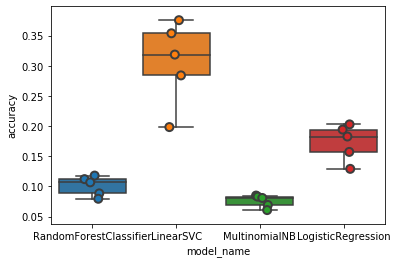

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [85]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.306244
LogisticRegression        0.173326
MultinomialNB             0.075802
RandomForestClassifier    0.101010
Name: accuracy, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [91]:
from IPython.display import display

In [95]:
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Label', 'Query']])
      print('')

IndexError: index 1565 is out of bounds for axis 0 with size 1565

In [96]:
model.fit(features, labels)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [100]:
from sklearn.feature_selection import chi2

N = 2
for Label, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Label))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


# '??d?':
  . Top unigrams:
       . music
       . sale
  . Top bigrams:
       . homes sale
       . buenos aires
# '?le-de-france':
  . Top unigrams:
       . led
       . parking
  . Top bigrams:
       . leeds bradford
       . homes sale
# 'abruzzo':
  . Top unigrams:
       . restaurant
       . calgary
  . Top bigrams:
       . charleston sc
       . north west
# 'academic conferences & publications':
  . Top unigrams:
       . academy
       . health
  . Top bigrams:
       . costa rica
       . mental health
# 'acapulco':
  . Top unigrams:
       . access
       . accessories
  . Top bigrams:
       . mobile phones
       . graphic design
# 'accident & personal injury law':
  . Top unigrams:
       . accomodation
       . accommodation
  . Top bigrams:
       . mexico city
       . management software
# 'accounting & auditing':
  . Top unigrams:
       . accounting
       . auditing
  . Top bigrams:
       . small business
       . travel agency
# 'accounting & financial soft

# 'audio & music software':
  . Top unigrams:
       . auditing
       . audi
  . Top bigrams:
       . global warming
       . baton rouge
# 'audio files formats & codecs':
  . Top unigrams:
       . device
       . audio
  . Top bigrams:
       . free download
       . internet download
# 'austin-round rock':
  . Top unigrams:
       . austin
       . tx
  . Top bigrams:
       . hard drive
       . fort worth
# 'australia':
  . Top unigrams:
       . australian
       . embassy
  . Top bigrams:
       . small business
       . florida keys
# 'australian football':
  . Top unigrams:
       . australian
       . perth
  . Top bigrams:
       . rock music
       . sports memorabilia
# 'austria':
  . Top unigrams:
       . austria
       . auto
  . Top bigrams:
       . ski resort
       . mobile phone
# 'auto financing':
  . Top unigrams:
       . photos
       . gospel
  . Top bigrams:
       . land sale
       . south africa
# 'auto insurance':
  . Top unigrams:
       . insurance
  

  . Top unigrams:
       . printing
       . austin
  . Top bigrams:
       . latin america
       . high school
# 'books & literature':
  . Top unigrams:
       . books
       . missouri
  . Top bigrams:
       . used cars
       . free online
# 'boots':
  . Top unigrams:
       . aids
       . plane
  . Top bigrams:
       . plane tickets
       . mobile phones
# 'bordeaux':
  . Top unigrams:
       . dishwasher
       . soundtrack
  . Top bigrams:
       . north korea
       . new mexico
# 'bosnia and herzegovina':
  . Top unigrams:
       . boston
       . bosnia
  . Top bigrams:
       . xbox 360
       . country music
# 'boston metro':
  . Top unigrams:
       . boston
       . party
  . Top bigrams:
       . property management
       . west virginia
# 'botswana':
  . Top unigrams:
       . society
       . building
  . Top bigrams:
       . games pc
       . public policy
# 'bottled water':
  . Top unigrams:
       . boutique
       . bottled
  . Top bigrams:
       . bottled w

# 'catalonia':
  . Top unigrams:
       . recovery
       . videos
  . Top bigrams:
       . mercedes benz
       . west midlands
# 'catering':
  . Top unigrams:
       . catering
       . songs
  . Top bigrams:
       . baton rouge
       . office supplies
# 'cats':
  . Top unigrams:
       . cat
       . rouge
  . Top bigrams:
       . baton rouge
       . free online
# 'caucasus':
  . Top unigrams:
       . cayman
       . cause
  . Top bigrams:
       . central asia
       . puerto rico
# 'cayman islands':
  . Top unigrams:
       . cayman
       . package
  . Top bigrams:
       . cayman islands
       . cost living
# 'cd & audio shopping':
  . Top unigrams:
       . cd
       . dvd
  . Top bigrams:
       . south africa
       . sports memorabilia
# 'cebu':
  . Top unigrams:
       . daily
       . cebu
  . Top bigrams:
       . latest news
       . soft drinks
# 'celebrities & entertainment news':
  . Top unigrams:
       . infertility
       . australia
  . Top bigrams:
       

# 'cookware & diningware':
  . Top unigrams:
       . cool
       . accommodation
  . Top bigrams:
       . casual shoes
       . los angeles
# 'copenhagen':
  . Top unigrams:
       . copenhagen
       . flats
  . Top bigrams:
       . apartments rent
       . apartment rent
# 'copiers':
  . Top unigrams:
       . corporate
       . toyota
  . Top bigrams:
       . fruit vegetable
       . event planning
# 'corporate & financial crime':
  . Top unigrams:
       . corporate
       . gift
  . Top bigrams:
       . hospitality industry
       . car hire
# 'corporate training':
  . Top unigrams:
       . melbourne
       . dresses
  . Top bigrams:
       . books online
       . online free
# 'corsica':
  . Top unigrams:
       . corsica
       . surgery
  . Top bigrams:
       . hotels star
       . new mexico
# 'cosmetic procedures':
  . Top unigrams:
       . gospel
       . antonio
  . Top bigrams:
       . mexico city
       . tv online
# 'cosmetology & beauty professionals':
  . Top 

# 'e-commerce services':
  . Top unigrams:
       . economic
       . gospel
  . Top bigrams:
       . land sale
       . project management
# 'ear nose & throat':
  . Top unigrams:
       . earthquake
       . earth
  . Top bigrams:
       . earth science
       . high school
# 'early childhood education':
  . Top unigrams:
       . early
       . investment
  . Top bigrams:
       . early childhood
       . new haven
# 'earth sciences':
  . Top unigrams:
       . resources
       . gospel
  . Top bigrams:
       . cheap hotel
       . business process
# 'east asians & diaspora':
  . Top unigrams:
       . east
       . coast
  . Top bigrams:
       . martial arts
       . performing arts
# 'east india':
  . Top unigrams:
       . east
       . trade
  . Top bigrams:
       . el salvador
       . public policy
# 'east midlands':
  . Top unigrams:
       . midlands
       . east
  . Top bigrams:
       . east midlands
       . washington state
# 'east timor':
  . Top unigrams:
       .

# 'fluid handling':
  . Top unigrams:
       . krakow
       . greece
  . Top bigrams:
       . farmers market
       . birth control
# 'folk & traditional music':
  . Top unigrams:
       . cheese
       . gospel
  . Top bigrams:
       . apartments rent
       . mexico city
# 'fonts':
  . Top unigrams:
       . scores
       . gospel
  . Top bigrams:
       . south africa
       . land sale
# 'food':
  . Top unigrams:
       . grocery
       . food
  . Top bigrams:
       . new guinea
       . papua new
# 'food & beverage events':
  . Top unigrams:
       . delivery
       . food
  . Top bigrams:
       . new haven
       . north korea
# 'food & drink':
  . Top unigrams:
       . food
       . france
  . Top bigrams:
       . apartments rent
       . north korea
# 'food & grocery retailers':
  . Top unigrams:
       . food
       . industry
  . Top bigrams:
       . bottled water
       . costa rica
# 'food processors':
  . Top unigrams:
       . review
       . food
  . Top bigrams:

# 'halloween & october 31st':
  . Top unigrams:
       . bay
       . savings
  . Top bigrams:
       . north carolina
       . alfa romeo
# 'hamburg':
  . Top unigrams:
       . hamburg
       . beach
  . Top bigrams:
       . bread maker
       . water sports
# 'hamilton-niagara peninsula':
  . Top unigrams:
       . ham
       . conditions
  . Top bigrams:
       . south africa
       . palm beach
# 'handball':
  . Top unigrams:
       . hand
       . handball
  . Top bigrams:
       . land sale
       . south africa
# 'handheld game consoles':
  . Top unigrams:
       . palm
       . denver
  . Top bigrams:
       . inland empire
       . south carolina
# 'hangzhou':
  . Top unigrams:
       . youth
       . international
  . Top bigrams:
       . film festival
       . mountain bike
# 'hanoi':
  . Top unigrams:
       . wallpapers
       . shenzhen
  . Top bigrams:
       . new year
       . new brunswick
# 'harbin':
  . Top unigrams:
       . harbin
       . temperature
  . Top b

# 'indigenous peoples':
  . Top unigrams:
       . plans
       . indigenous
  . Top bigrams:
       . health safety
       . books online
# 'indonesia':
  . Top unigrams:
       . indoor
       . industrial
  . Top bigrams:
       . lonely planet
       . free download
# 'industrial & product design':
  . Top unigrams:
       . glasses
       . gerd
  . Top bigrams:
       . mental health
       . engagement rings
# 'infectious diseases':
  . Top unigrams:
       . infectious
       . diseases
  . Top bigrams:
       . infectious diseases
       . games online
# 'infiniti':
  . Top unigrams:
       . information
       . convertible
  . Top bigrams:
       . mutual funds
       . global warming
# 'inheritance & estate planning':
  . Top unigrams:
       . counseling
       . jakarta
  . Top bigrams:
       . west bengal
       . southern california
# 'inland empire':
  . Top unigrams:
       . inland
       . trailer
  . Top bigrams:
       . assisted living
       . public records
# 

  . Top unigrams:
       . ladies
       . labor
  . Top bigrams:
       . social security
       . los angeles
# 'lagos':
  . Top unigrams:
       . la
       . culture
  . Top bigrams:
       . assisted living
       . fort worth
# 'lahore':
  . Top unigrams:
       . lake
       . toyota
  . Top bigrams:
       . used cars
       . birmingham al
# 'lake tahoe':
  . Top unigrams:
       . lake
       . tahoe
  . Top bigrams:
       . lake tahoe
       . new zealand
# 'lamborghini':
  . Top unigrams:
       . lamborghini
       . lamp
  . Top bigrams:
       . mexico city
       . west bengal
# 'lamps & lighting':
  . Top unigrams:
       . land
       . mitsubishi
  . Top bigrams:
       . land sale
       . education jobs
# 'land rover':
  . Top unigrams:
       . language
       . end
  . Top bigrams:
       . sao paulo
       . fort worth
# 'language resources':
  . Top unigrams:
       . language
       . learn
  . Top bigrams:
       . new guinea
       . papua new
# 'languedoc-

# 'medical devices & equipment':
  . Top unigrams:
       . doctors
       . medical
  . Top bigrams:
       . employment law
       . special education
# 'medical facilities & services':
  . Top unigrams:
       . medical
       . health
  . Top bigrams:
       . xbox 360
       . health safety
# 'medical literature & resources':
  . Top unigrams:
       . degree
       . medical
  . Top bigrams:
       . earth science
       . dallas fort
# 'medical procedures':
  . Top unigrams:
       . medical
       . distributors
  . Top bigrams:
       . uttar pradesh
       . table tennis
# 'medical tests & exams':
  . Top unigrams:
       . doctors
       . naples
  . Top bigrams:
       . business process
       . new mexico
# 'mediterranean europe':
  . Top unigrams:
       . mediterranean
       . restaurant
  . Top bigrams:
       . weather forecast
       . el paso
# 'mediterranean turkey':
  . Top unigrams:
       . streaming
       . shirts
  . Top bigrams:
       . free download
     

# 'new south wales':
  . Top unigrams:
       . newspaper
       . bangladesh
  . Top bigrams:
       . tel aviv
       . internet cafe
# 'new year':
  . Top unigrams:
       . new
       . cottages
  . Top bigrams:
       . new year
       . tourist attractions
# 'new york city':
  . Top unigrams:
       . breaks
       . york
  . Top bigrams:
       . york city
       . new york
# 'new york state':
  . Top unigrams:
       . state
       . york
  . Top bigrams:
       . york state
       . new york
# 'new zealand':
  . Top unigrams:
       . zealand
       . africa
  . Top bigrams:
       . new zealand
       . new hampshire
# 'newfoundland & labrador':
  . Top unigrams:
       . housing
       . bengal
  . Top bigrams:
       . new mexico
       . download manager
# 'news':
  . Top unigrams:
       . news
       . publishing
  . Top bigrams:
       . fort worth
       . free games
# 'newspapers':
  . Top unigrams:
       . wallpapers
       . websites
  . Top bigrams:
       . local

# 'pediatrics':
  . Top unigrams:
       . lamp
       . devices
  . Top bigrams:
       . road map
       . new mexico
# 'pennsylvania':
  . Top unigrams:
       . pennsylvania
       . people
  . Top bigrams:
       . mexico city
       . trinidad tobago
# 'people & society':
  . Top unigrams:
       . sheets
       . set
  . Top bigrams:
       . martial arts
       . alfa romeo
# 'people search':
  . Top unigrams:
       . people
       . search
  . Top bigrams:
       . san francisco
       . northern territory
# 'performing arts':
  . Top unigrams:
       . performing
       . perfume
  . Top bigrams:
       . performing arts
       . north korea
# 'perfumes & fragrances':
  . Top unigrams:
       . generator
       . shirt
  . Top bigrams:
       . hair removal
       . fiat 500
# 'pernambuco':
  . Top unigrams:
       . personal
       . accounting
  . Top bigrams:
       . software free
       . bad credit
# 'personal aircraft':
  . Top unigrams:
       . personal
       . pup

# 'rajasthan':
  . Top unigrams:
       . rajasthan
       . board
  . Top bigrams:
       . open source
       . latest news
# 'raleigh-durham':
  . Top unigrams:
       . hood
       . furniture
  . Top bigrams:
       . games free
       . land sale
# 'rap & hip-hop':
  . Top unigrams:
       . read
       . soul
  . Top bigrams:
       . music free
       . books online
# 'real estate agencies':
  . Top unigrams:
       . antigua
       . finance
  . Top bigrams:
       . real estate
       . business plan
# 'real estate investment trusts':
  . Top unigrams:
       . nevada
       . vegas
  . Top bigrams:
       . las vegas
       . real estate
# 'real estate listings':
  . Top unigrams:
       . real
       . drivers
  . Top bigrams:
       . minh city
       . teaching jobs
# 'recife':
  . Top unigrams:
       . cholesterol
       . low
  . Top bigrams:
       . kitchen appliances
       . high school
# 'record labels':
  . Top unigrams:
       . eating
       . record
  . Top bi

  . Top bigrams:
       . latest news
       . assisted living
# 'seniors & retirement':
  . Top unigrams:
       . clubs
       . tips
  . Top bigrams:
       . oil gas
       . costa rica
# 'seoul':
  . Top unigrams:
       . divorce
       . guide
  . Top bigrams:
       . radio online
       . rent car
# 'serbia':
  . Top unigrams:
       . serbia
       . memphis
  . Top bigrams:
       . rio janeiro
       . northern ireland
# 'sergipe':
  . Top unigrams:
       . serviced
       . ca
  . Top bigrams:
       . management software
       . office supplies
# 'service providers':
  . Top unigrams:
       . physics
       . construction
  . Top bigrams:
       . music video
       . web service
# 'seville':
  . Top unigrams:
       . sex
       . guide
  . Top bigrams:
       . cheap flights
       . home office
# 'sex education & counseling':
  . Top unigrams:
       . sex
       . costumes
  . Top bigrams:
       . engineering technology
       . new hampshire
# 'sexually transmitt

# 'study grants & scholarships':
  . Top unigrams:
       . study
       . buddhism
  . Top bigrams:
       . andhra pradesh
       . food service
# 'stuffed toys':
  . Top unigrams:
       . orlando
       . gospel
  . Top bigrams:
       . rent car
       . project management
# 'subaru':
  . Top unigrams:
       . subaru
       . deals
  . Top bigrams:
       . ice skating
       . mountain bike
# 'subcultures & niche interests':
  . Top unigrams:
       . record
       . film
  . Top bigrams:
       . sheet music
       . property management
# 'substance abuse':
  . Top unigrams:
       . abuse
       . teacher
  . Top bigrams:
       . birmingham al
       . track field
# 'sudan':
  . Top unigrams:
       . sudan
       . content
  . Top bigrams:
       . tv online
       . los angeles
# 'sulawesi':
  . Top unigrams:
       . industry
       . house
  . Top bigrams:
       . andhra pradesh
       . investment banking
# 'sumatra':
  . Top unigrams:
       . summer
       . mail
  . 

# 'undergarments':
  . Top unigrams:
       . indigenous
       . unemployment
  . Top bigrams:
       . hip hop
       . human rights
# 'uniforms & workwear':
  . Top unigrams:
       . pacific
       . indigenous
  . Top bigrams:
       . northern territory
       . san antonio
# 'unions & labor movement':
  . Top unigrams:
       . unique
       . queensland
  . Top bigrams:
       . united kingdom
       . northern ireland
# 'united arab emirates':
  . Top unigrams:
       . united
       . immigration
  . Top bigrams:
       . north west
       . music radio
# 'united kingdom':
  . Top unigrams:
       . university
       . universities
  . Top bigrams:
       . united states
       . united kingdom
# 'unwanted body & facial hair removal':
  . Top unigrams:
       . schedule
       . michigan
  . Top bigrams:
       . dallas fort
       . south carolina
# 'upstate south carolina':
  . Top unigrams:
       . carolina
       . map
  . Top bigrams:
       . south carolina
       . co

# 'work & labor issues':
  . Top unigrams:
       . workout
       . glasgow
  . Top bigrams:
       . film festival
       . weight loss
# 'world localities':
  . Top unigrams:
       . world
       . map
  . Top bigrams:
       . puerto vallarta
       . tv shows
# 'world news':
  . Top unigrams:
       . world
       . yemen
  . Top bigrams:
       . climate change
       . local news
# 'wrestling':
  . Top unigrams:
       . blog
       . boys
  . Top bigrams:
       . places visit
       . el paso
# 'writers resources':
  . Top unigrams:
       . writing
       . articles
  . Top bigrams:
       . places visit
       . new zealand
# 'writing & editing services':
  . Top unigrams:
       . writing
       . driving
  . Top bigrams:
       . event planning
       . birth control
# 'wroclaw':
  . Top unigrams:
       . berlin
       . train
  . Top bigrams:
       . latin america
       . special education
# 'wuhan':
  . Top unigrams:
       . www
       . forestry
  . Top bigrams:
  

In [106]:
from sklearn import metrics


In [111]:
print(metrics.classification_report(y_test, y_pred, labels.unique(), target_names=df['Label'].unique()))

                                              precision    recall  f1-score   support

                                     abruzzo       0.00      0.00      0.00         0
         academic conferences & publications       0.00      0.00      0.00         0
                                    acapulco       0.00      0.00      0.00         1
              accident & personal injury law       0.29      0.40      0.33         5
                       accounting & auditing       0.00      0.00      0.00         2
             accounting & financial software       0.00      0.00      0.00         5
                            acting & theater       0.00      0.00      0.00         1
                    action & adventure films       0.00      0.00      0.00         1
                              action figures       0.00      0.00      0.00         1
                     action & platform games       0.00      0.00      0.00         1
                                       acura       0.